# Cleaning Astronomical Datasets

I have posed two problems for you to work on in this hands-on exercise.  

- Concept drift: Do the training and test set distributions differ?
- Find mislabeled examples in the labeled ZTF data provided

More information for each is provided below.  You may want or need to cut and paste code from your other notebooks.  But first...


### 0a. Imports

These are all the imports that will be used in this notebook.  All should be available in the DSFP conda environment.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
# You can add anything you need as you work

### 0b. Data Location

We will use the same data from the Day 2 clustering exercise (see [that notebook](https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/master/Session7/Day2/Clustering-Astronomical-Sources.ipynb) to download the data).

Please specify paths for the following:

In [2]:
F_META = '/Users/ioanaciuca/Desktop/MasterFolder/LSSTC/LSSTC-DSFP-Sessions/Session7/Day2/dsfp_ztf_meta.npy'
F_FEATS = '/Users/ioanaciuca/Desktop/MasterFolder/LSSTC/LSSTC-DSFP-Sessions/Session7/Day2/dsfp_ztf_feats.npy'
D_STAMPS = '/Users/ioanaciuca/Desktop/MasterFolder/LSSTC/LSSTC-DSFP-Sessions/Session7/Day2/dsfp_ztf_png_stamps'

### 0c. Load Data

In [3]:
meta_np = np.load(F_META)
feats_np = np.load(F_FEATS)

COL_NAMES = ['diffmaglim', 'magpsf', 'sigmapsf', 'chipsf', 'magap', 'sigmagap',
             'distnr', 'magnr', 'sigmagnr', 'chinr', 'sharpnr', 'sky',
             'magdiff', 'fwhm', 'classtar', 'mindtoedge', 'magfromlim', 'seeratio',
             'aimage', 'bimage', 'aimagerat', 'bimagerat', 'elong', 'nneg',
             'nbad', 'ssdistnr', 'ssmagnr', 'sumrat', 'magapbig', 'sigmagapbig',
             'ndethist', 'ncovhist', 'jdstarthist', 'jdendhist', 'scorr', 'label']

# NOTE FROM Umaa: I've decided to eliminate the following features. Dropping them.
#
COL_TO_DROP = ['ndethist', 'ncovhist', 'jdstarthist', 'jdendhist', 
               'distnr', 'magnr', 'sigmagnr', 'chinr', 'sharpnr', 
               'classtar', 'ssdistnr', 'ssmagnr', 'aimagerat', 'bimagerat', 
               'magapbig', 'sigmagapbig', 'scorr']
feats_df = pd.DataFrame(data=feats_np, index=meta_np['candid'], columns=COL_NAMES)
print("There are {} columns left.".format(len(feats_df.columns)))
print("They are: {}".format(list(feats_df.columns)))
feats_df.drop(columns=COL_TO_DROP, inplace=True) 
#feats_df.describe()

There are 36 columns left.
They are: ['diffmaglim', 'magpsf', 'sigmapsf', 'chipsf', 'magap', 'sigmagap', 'distnr', 'magnr', 'sigmagnr', 'chinr', 'sharpnr', 'sky', 'magdiff', 'fwhm', 'classtar', 'mindtoedge', 'magfromlim', 'seeratio', 'aimage', 'bimage', 'aimagerat', 'bimagerat', 'elong', 'nneg', 'nbad', 'ssdistnr', 'ssmagnr', 'sumrat', 'magapbig', 'sigmagapbig', 'ndethist', 'ncovhist', 'jdstarthist', 'jdendhist', 'scorr', 'label']


In [10]:
colnames = feats_df.columns.tolist()
colnames

['diffmaglim',
 'magpsf',
 'sigmapsf',
 'chipsf',
 'magap',
 'sigmagap',
 'sky',
 'magdiff',
 'fwhm',
 'mindtoedge',
 'magfromlim',
 'seeratio',
 'aimage',
 'bimage',
 'elong',
 'nneg',
 'nbad',
 'sumrat',
 'label']

## 1. Concept Drift

In the last exercise, you created a training and test set for the purposes of building a classifier.  The goal of this exercise is to note any changes in the feature distributions for these two sets.

Per feature, can you:

- plot test vs. train distributions for both real and bogus, and note areas that does not overlap
- quantiatively measure this using [Kullback-Leibler divergence](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html), and print or plot the scores for all features.

Which feature exhibits the most drift between train and test?

In [47]:
nids = meta_np['nid']
nids
test_df = feats_df[nids >= 550]
train_df = feats_df[nids < 550]

real_test_df = test_df[test_df['label'] == 1]
bogus_test_df = test_df[test_df['label'] == 0]

real_train_df = train_df[train_df['label'] == 1]
bogus_train_df = train_df[train_df['label'] == 0]
#mask_train
#feats_df_train = feats_df[mask_train]
#feats_df_test = feats_df[mask_test]

In [66]:
colnames = feats_df.columns
colnames
real_test_df['c']

AttributeError: 'DataFrame' object has no attribute 'colnames'

In [ ]:
for i in range(len(colnames))

ValueError: operands could not be broadcast together with shapes (572,) (269,) 

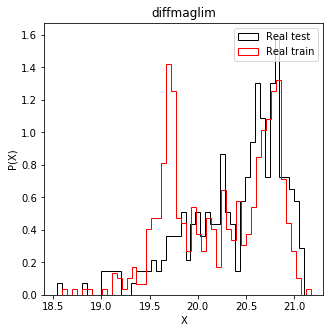

In [72]:
from scipy.stats import entropy

for i in range(len(colnames)):
    fig = plt.figure(figsize = (5, 5))
    plt.hist(real_test_df[colnames[i]], color = 'k', bins = 50, histtype = 'step', label = 'Real test', density = True)
    plt.hist(real_train_df[colnames[i]], color = 'r', bins = 50, histtype = 'step', label = 'Real train', density = True)
    plt.xlabel('X')
    plt.ylabel('P(X)')
    plt.legend()
    plt.title(colnames[i])
    min_x = min(np.array(real_test_df[colnames[i]]), np.array(real_train_df[colnames[i]]))
    max_x = max(np.array(real_test_df[colnames[i]]), np.array(real_train_df[colnames[i]]))
    bins = np.linspace(min_x, max_x, 10)
    print(bins)
    n1 = np.histogram(real_test_df[colnames[i]], bins = bins, density = True)
    n2 = np.histogram(real_train_df[colnames[i]], bins = bins, density = True)
    from scipy.stats import entropy
    KL = entropy(n1, n2)
    print('KL entropy for %s is' %colnames[i], KL)
    plt.show()

# 2. Finding Mislabeled Examples

This task ties together the work you did for the unsupervised and supervised exercises.  Here's how to get started.

1. Cluster the entire labeled set provided to you.  How you choose to do the clustering is up to you.  I would recommend getting your clustering results into a two dimensional space that you can plot, but this is not strictly necessary.

2. Apply the labels to the clusters you've created and plot them.  If you're working in a >=3-dimensional space, find a way to print the candids in each cluster.  You can sort the list by examples that are closet to the centroids, and print their associated labels.

3. Look at some postage stamps of examples you suspect are mislabeled.  Can you devise a simple way to identify a set of mislabeled examples?  Can you come up with an estimate of how many examples are mislabeled?

In [9]:
#PCA...
feats_df = > featurees, labels
? pca on the labels = 2d set
run a clustering algo